In [7]:
import numpy as np
import matplotlib.pyplot as plt

**Task**: 
Find the area of the unit circle to approximate $\pi$. Namely, we want to compute
$$ \int_0^r \sqrt{r^2-x^2}dx \quad\text{for } r=1$$
We all know the true value is $\pi/4$. ( pi r² )

Let $f(x)=\sqrt{1-x^2}$.

Perform a single simulation for each value of $M = 10, 20, 30, \ldots, 500$. 
Plot the estimates and draw a horizontal line at the true value $f = \pi/4$.

Draw 1,000,000 Monte-Carlo samples and compute the absolute value of the error.

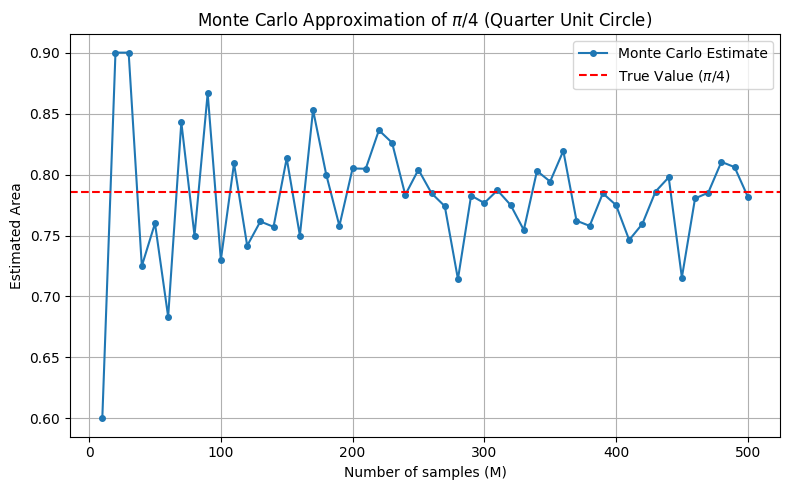

Monte Carlo estimate with 1000000 samples: 0.785563
Absolute error: 0.00016483660255173227


In [8]:

# --- Parameters ---
M_values = np.arange(10, 501, 10)
true_value = np.pi / 4

# --- RNG setup ---
rng = np.random.default_rng(seed=42)  # reproducible results

# --- Monte Carlo simulation for each M - hit/miss approach ---
estimates = []
for M in M_values:
    x_samples = rng.uniform(0, 1, M)
    y_samples = rng.uniform(0, 1, M)
    hits = y_samples <= np.sqrt(1 - x_samples**2)
    area_estimate = np.mean(hits)  # fraction of hits × 1×1 = area
    estimates.append(area_estimate)

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(M_values, estimates, label='Monte Carlo Estimate', marker='o', markersize=4, linestyle='-')
ax.axhline(true_value, color='red', linestyle='--', label=r'True Value ($\pi/4$)')
ax.set_xlabel('Number of samples (M)')
ax.set_ylabel('Estimated Area')
ax.set_title(r'Monte Carlo Approximation of $\pi/4$ (Quarter Unit Circle)')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()

# --- Large simulation for error estimation ---
M_large = 1_000_000
x_large = rng.uniform(0, 1, M_large)
y_large = rng.uniform(0, 1, M_large)
hits_large = y_large <= np.sqrt(1 - x_large**2)
estimate_large = np.mean(hits_large)
abs_error = np.abs(estimate_large - true_value)

print(f"Monte Carlo estimate with {M_large} samples: {estimate_large}")
print(f"Absolute error: {abs_error}")

### Large simulation for error estimation

In [9]:

M_large = 1_000_000
x_large = rng.uniform(0, 1, M_large)
y_large = rng.uniform(0, 1, M_large)
hits_large = np.sum(x_large**2 + y_large**2 <= 1)
estimate_large = hits_large / M_large

abs_error = np.abs(estimate_large - true_value)

print(f"Monte Carlo estimate with {M_large} samples: {estimate_large}")
print(f"Absolute error: {abs_error}")

Monte Carlo estimate with 1000000 samples: 0.785529
Absolute error: 0.00013083660255175378


**Task**: Let $X \sim \mathcal{N}(1, 3)$ and define $f(x) = 1 + 2x + x^2$, as in the second exercise sheet.

We want to approximate the expected value of $f(X)$ using the Monte Carlo method:

$$
\mathbb{E}[f(X)] \approx f_M(\mathbf{x}) := \frac{1}{M} \sum_{i=1}^M f(x_i), \qquad x_i \overset{\text{i.i.d.}}{\sim} \mathcal{N}(1, 3).
$$

Let $M = 2, 4, 8, \ldots, 256$ and run $N = 1000$ simulations. For each $M$, we compute $N$ independent estimates:

$$
\mathbf{f}_M^N := \left(f_M(\mathbf{x}_k)\right)_{k=1}^N = \left( \frac{1}{M} \sum_{i=1}^M f(x_{k,i}) \right)_{k=1}^N, \quad x_{k,i} \overset{\text{i.i.d.}}{\sim} \mathcal{N}(1, 3).
$$

- For each $M$, compute $N$ simulations (realizations) of $f_M$.
- For each $M$, plot the **mean** and **variance** of $\mathbf{f}_M^N$.
- Observe: the variance of $\mathbf{f}_M^N$ should decrease as $M$ increases. Can you explain or prove why?

---

Now, add **confidence intervals** to the plot of the mean:

$$
\mathbb{E}[f(X)] \approx \frac{1}{N} \sum_{k=1}^N f_M(\mathbf{x}_k) \pm z \cdot \frac{s_{N,M}}{\sqrt{N}},
$$

where:
- $z = 1.96$ for a $95\%$ confidence interval,
- $s_{N,M}$ is the sample standard deviation of $\mathbf{f}_M^N$:

$$
s_{N,M} = \sqrt{\operatorname{Var}(\mathbf{f}_M^N)}.
$$


In [10]:
def f(x):
    return 1 + 2 * x + x**2

# Parameters
M_values = [2**i for i in range(1, 9)]  # M = 2, 4, ..., 256
N = 1000  # Number of simulations for each M

rng = np.random.default_rng(seed=42)
means = []
variances = []

for M in M_values:
    f_M_simulations = np.zeros(N)
    for n in range(N):
        # Generate M samples from N(1, 3)
        samples = rng.normal(loc=1, scale=np.sqrt(3), size=M)
        # Evaluate f(x) and take the average
        f_M_simulations[n] = np.mean(f(samples))
    
    # Store mean and variance of f_M estimates over N simulations
    means.append(np.mean(f_M_simulations))
    variances.append(np.var(f_M_simulations))

### Plots


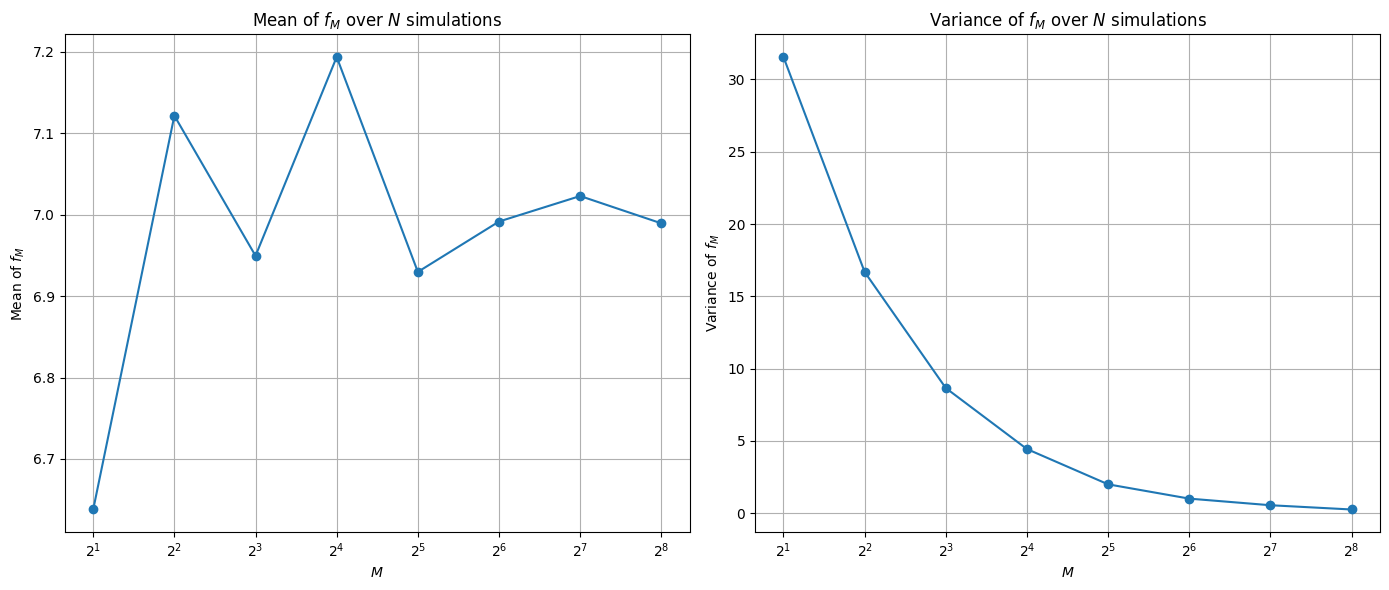

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # Create 1 row, 2 columns of axes

# Plot for means
axs[0].plot(M_values, means, marker='o', linestyle='-')
axs[0].set_title('Mean of $f_M$ over $N$ simulations')
axs[0].set_xlabel('$M$')
axs[0].set_ylabel('Mean of $f_M$')
axs[0].set_xscale('log', base=2)
axs[0].grid(True)

# Plot for variances
axs[1].plot(M_values, variances, marker='o', linestyle='-')
axs[1].set_title('Variance of $f_M$ over $N$ simulations')
axs[1].set_xlabel('$M$')
axs[1].set_ylabel('Variance of $f_M$')
axs[1].set_xscale('log', base=2)
axs[1].grid(True)

fig.tight_layout()
plt.show()

**Task**:
$$
P = \quad
\begin{array}{c|ccc}
& \text{S}_{\text{next}} & \text{I}_{\text{next}} & \text{R}_{\text{next}} \\\hline
\text{S}_{\text{now}} & 0.8 & 0.1 & 0.1 \\
\text{I}_{\text{now}} & 0 & 0.8 & 0.2 \\
\text{R}_{\text{now}} & 0.1 & 0 & 0.9 \\
\end{array}
$$

Given is the SIRS model from task 3 in the exercise sheet and the initial distribution $ \pi_0 = (0.9, 0.1, 0) $.
Consider a population of 10 million individuals. Currently, there are 1 million infected and 1 million just recovered, leaving 8 million people susceptible for an influenza infection.

- simulate the SIRS model for 52 time steps using random sampling from P.
- Print or plot the number of susceptible, infected, and recovered individuals at each time step.
- Calculate the stationary invariant distribution $\pi_\ast$ and answer the question how many weeks in a lifetime (80 years) one will be infected on average.

In [12]:
# Define the transition matrix
P = np.array([
    [0.8, 0.1, 0.1],
    [0,   0.8, 0.2],
    [0.1, 0,   0.9]
])

# Define the initial probability distribution
pi_0 = np.array([0.9, 0.1, 0])

Verify result for task 1 (probabilities after two time steps).

In [13]:
# Calculate the probability distribution after one time step
pi_1 = pi_0 @ P

# Calculate the probability distribution after two time steps
pi_2 = pi_1 @ P

# Print the results
print("Probability distribution after one time step (pi_1):")
print(pi_1)

print("Probability distribution after two time steps (pi_2):")
print(pi_2)

Probability distribution after one time step (pi_1):
[0.72 0.17 0.11]
Probability distribution after two time steps (pi_2):
[0.587 0.208 0.205]


In [14]:
# Initial state: 8 million susceptible, 1 million infected, 1 million recovered
initial_state = np.array([8_000_000, 1_000_000, 1_000_000])

# Number of time steps
num_steps = 52

### SIRS - single trajectory over num_steps

In [15]:

def simulate_sirs(initial_state, P, num_steps, seed=42):
    # list of states, starting with initial state
    states_over_time = [initial_state.copy()]
    # initialize random number generator with given seed
    rng = np.random.default_rng(seed=seed)

    state = initial_state
    for _ in range(num_steps):
        next_state = np.zeros(3)
        for i in range(3): # S-I-R
            count = state[i]
            if count > 0:
                transition = rng.multinomial(count, P[i])
                next_state += transition
        states_over_time.append(next_state.copy())
        state = next_state
    
    return np.array(states_over_time)

### Run the simulation - single trajectory for SIRS

In [16]:
states_over_time = simulate_sirs(initial_state, P, num_steps)

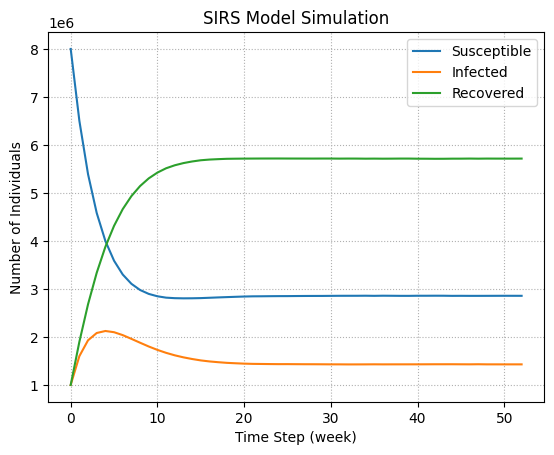

In [17]:
# Part 2: Plot the results
fig, ax = plt.subplots()
ax.plot(states_over_time[:, 0], label='Susceptible')
ax.plot(states_over_time[:, 1], label='Infected')
ax.plot(states_over_time[:, 2], label='Recovered')
ax.set_xlabel('Time Step (week)')
ax.set_ylabel('Number of Individuals')
ax.set_title('SIRS Model Simulation')
ax.legend()
plt.grid(True, ls=':')
plt.show()

In [18]:
eigenvalues, eigenvectors = np.linalg.eig(P.T)
eigenvalues

array([1.  +0.j        , 0.75+0.08660254j, 0.75-0.08660254j])

### Part 3: Calculate the stationary invariant distribution

1. Find the eigenvalues and eigenvectors of P.T

2. Find the eigenvector corresponding to the eigenvalue 1 (due to floating point precision we use np.isclose instead of '==')

3. Normalize the eigenvector to get the stationary distribution
 


In [19]:

def find_stationary_distribution(P):
   
    eigenvalues, eigenvectors = np.linalg.eig(P.T)
    stationary_distribution = eigenvectors[:, np.isclose(eigenvalues, 1)].real.flatten()

    stationary_distribution /= stationary_distribution.sum()
    
    return stationary_distribution

### Calculate the stationary distribution

In [20]:

stationary_distribution = find_stationary_distribution(P)

weeks_in_the_lifetime = 80 * 52
average_infected_weeks = weeks_in_the_lifetime * stationary_distribution[1]


print(f"Stationary Distribution: {stationary_distribution}")
print(f"Average number of weeks one will be infected in a lifetime: {average_infected_weeks:.2f} weeks or {average_infected_weeks/52:.2f} years")

Stationary Distribution: [0.28571429 0.14285714 0.57142857]
Average number of weeks one will be infected in a lifetime: 594.29 weeks or 11.43 years


In [21]:
stationary_distribution*52

array([14.85714286,  7.42857143, 29.71428571])

#### Plotter

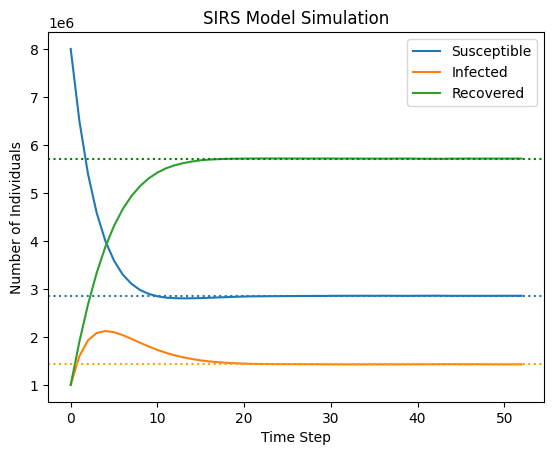

In [22]:
total_pop = np.sum(initial_state)
fig, ax = plt.subplots()
ax.plot(states_over_time[:, 0], label='Susceptible')
ax.plot(states_over_time[:, 1], label='Infected')
ax.plot(states_over_time[:, 2], label='Recovered')
ax.axhline(stationary_distribution[0]*total_pop, linestyle=':')
ax.axhline(stationary_distribution[1]*total_pop, c='orange', linestyle=':')
ax.axhline(stationary_distribution[2]*total_pop, c='g', linestyle=':')
ax.set_xlabel('Time Step')
ax.set_ylabel('Number of Individuals')
ax.set_title('SIRS Model Simulation')
ax.legend()
plt.show()